In [8]:
from util.spray_util import load_spray_df

spray_directory = "../res/sprays"
df = load_spray_df(spray_directory)

df

,match_id,map_id,player_id,filename,length
0,92650,0,76561198257770857,95.npy,9
1,92650,0,76561198257770857,97.npy,7
2,92650,0,76561198257770857,96.npy,9
3,92650,0,76561198257770857,98.npy,15
4,92650,0,76561198257770857,102.npy,5
...,...,...,...,...,...
49834,92419,1,76561198851073805,112.npy,11
49835,92419,1,76561198174431453,79.npy,6
49836,92419,1,76561198174431453,77.npy,12
49837,92419,1,76561198174431453,67.npy,6


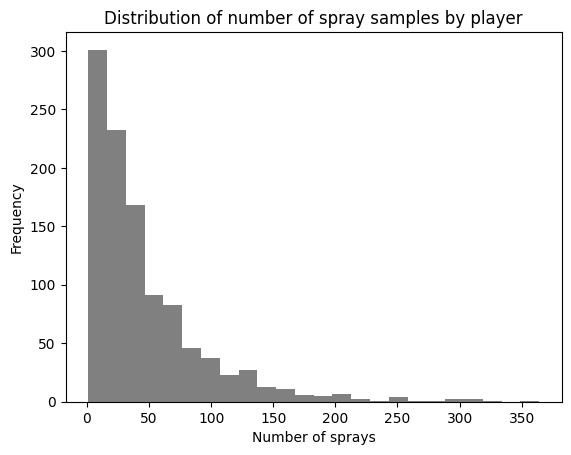

In [17]:
from matplotlib import pyplot as plt

df.groupby("player_id").size().plot(kind="hist", color="gray", xlabel="Number of sprays",
                                    title="Distribution of number of spray samples by player",
                                    bins=24)
plt.show()

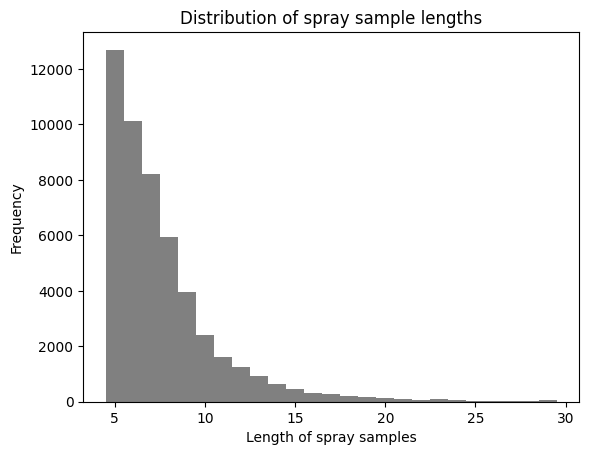

In [10]:
plt.hist(df["length"], bins=25, align="left", color="gray")
plt.xlabel("Length of spray (in shots)")
plt.ylabel("Frequency")
plt.title("Distribution of spray sample lengths")
plt.show()

In [11]:
total_shots = int(df["length"].sum())
print("total shots", total_shots)

# rds * mins/rds = mins
total_mins = (total_shots - df.shape[0]) / 60
print("total minutes", total_mins)

total_hours = total_mins / 60
print("total hours", total_hours)

total shots 381583
total minutes 5529.066666666667
total hours 92.1511111111111


In [12]:
total_matches = int(df["match_id"].unique().shape[0])
print("total matches", total_matches)

total_maps = int(df[["match_id", "map_id"]].drop_duplicates().shape[0])
print("total maps", total_maps)

total matches 521
total maps 1008


In [50]:
import os

import numpy as np

# limit sprays to first few bullets
max_length = 30
filtered_df = df[df["length"] <= max_length]

data = []
for i, row in filtered_df.iterrows():
    filename = f"{row.match_id}/{row.map_id}/{row.player_id}/{row.filename}"
    filepath = os.path.join(spray_directory, filename)
    array = np.load(filepath)
    data.append(array)

len(data)

49839

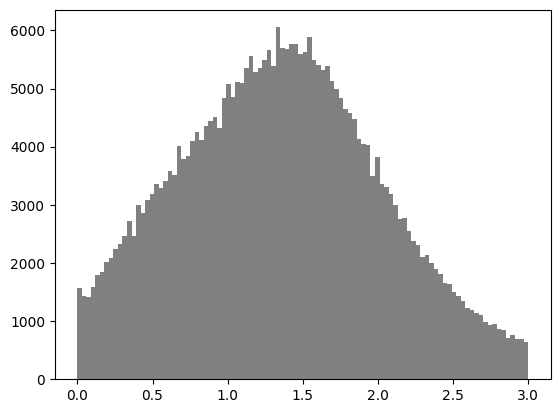

In [51]:
diffs = []
for spray in data:
    diff = np.sqrt(np.sum(np.diff(spray, axis=0) ** 2, axis=1))
    diffs.extend(diff)

plt.hist(diffs, bins=100, color="gray")
plt.show()

In [52]:
pitches = []
yaws = []
for spray in data:
    pitches.extend(spray[1:, 0])
    yaws.extend(spray[1:, 1])

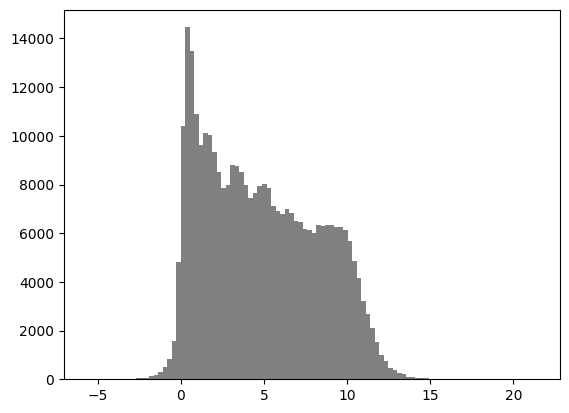

In [53]:
plt.hist(pitches, bins=100, color="gray")
plt.show()

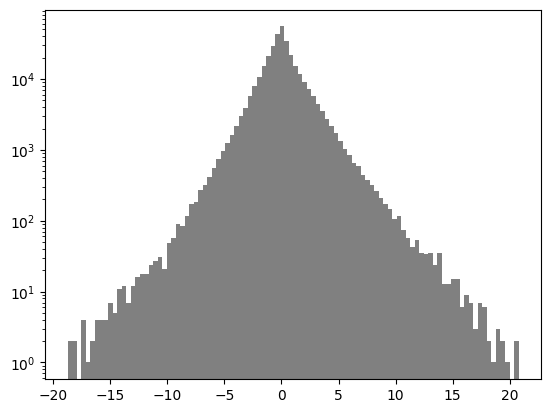

In [57]:
plt.hist(yaws, bins=100, color="gray", log=True)
plt.show()